# 트리의 정의

## 수학(그래프 이론)에서의 트리
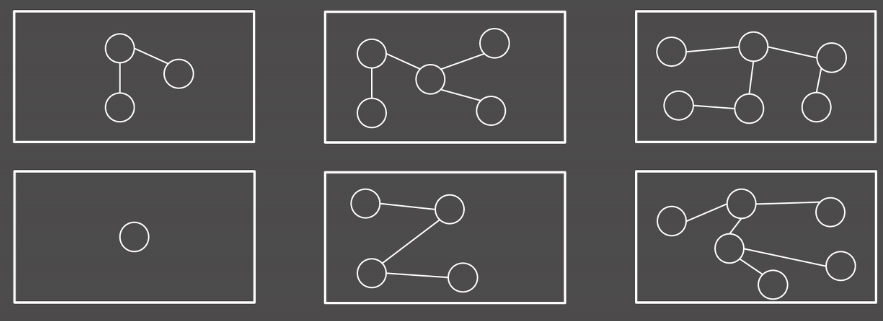
- **무방향이면서 사이클이 없는 그래프(Undirected Acyclic Connected Graph)**
- **임의의 두 점을 연결하는 simple path(정점이 중복해서 나오지 않는 경로)가 유일한 그래프**
- **V개의 정점을 가지고 V-1개의 간선을 가지는 Acyclic 그래프**
- 사이클이 없는 연결 그래프이면서 임의의 간선을 추가하면 사이클이 생기는 그래프
- 연결 그래프이면서 임의의 간선을 제거하면 연결 그래프가 아니게 되는 그래프

## 자료구조에서의 트리
- 자료구조에서는 그래프 이론의 **rooted tree**를 트리라고 정의한다.
- 부모-자식 관계로 정의하고, 부모에서 자식으로 간선이 이어져 있는 **유향 그래프**이다.
- 재귀로 정의된(Recursive Defined) 자기 참조(Self-Referential) 자료구조이다.\
(부모 노드 밑에 여러 자식 노드가 연결되고, 자식 노드 각각에 다시 자식 노드가 연결되는 재귀적 형태의 자료구조다. 쉽게 말해, 트리는 자식도 트리고 또 그 자식도 트리다)
 
https://stackoverflow.com/questions/14315621/are-trees-directed-or-undirected-graphs

# 트리의 각 명칭
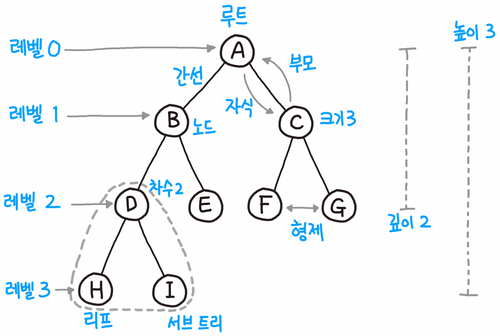

- Node: 트리에서 데이터를 저장하는 기본 요소 (데이터와 다른 연결된 노드에 대한 Branch 정보 포함)
- Root Node: 트리에서 부모가 없는 최상위 노드, 트리의 시작점(루트는 자식 노드를 가지며, 간선(edge)로 연결되어 있다.
- Level: 루트 노드(level=0)부터 노드까지 연결된 간선 수의 합
- Parent Node: 루트 노드 방향으로 직접 연결된 노드
- Child Node: 어떤 노드의 상위 레벨에 연결된 노드
- Leaf Node (Terminal Node): Child Node가 하나도 없는 노드
- Degree: 자식 노드의 개수
- Sibling (Brother Node): 동일한 Parent Node를 가진 노드
- Depth(깊이): 트리에서 Node가 가질 수 있는 최대 Level (ex. Depth가 2이면 루트에서 해당 노드까지의 거리가 2임을 의미)
- Height: 가장 긴 루트 경로의 길이

# 그래프 VS 트리
<u>Q. 그래프와 트리의 차이점은 무엇일까?</u>
> "트리는 <b>순환 구조를 갖지 않는 그래프</b>이다."

- 트리는 <u>특수한 형태의 그래프의 일종</u>이며, 그래프와 달리 어떤 경우에도 한번 연결된 노드가 다시 연결되지 않는다.
- 단방향, 양방향을 모두 가리킬 수 있는 그래프와 달리, 트리는 부모 노드에서 자식 노드를 가리키는 <b>단방향</b>뿐이다.
- 하나의 부모 노드만 가져야 하고, 루트 또한 하나여야 한다.
- 정점이 1개, 간선이 없는 그래프도 트리이다.

# 트리에서의 BFS와 DFS

## BFS 
- 임의의 시작점을 잡으면, 그 시작점을 루트로 정해서 트리를 재배치했을 때의 **높이** 순으로 방문한다.
- 인접한 정점들 중에 자신의 부모를 제외하고 (자신의 자식들만) 큐에 삽입한다.
- 즉, 방문처리 배열이 따로 필요 없이, 부모가 누구인지만 저장하면 된다.

시간복잡도: O(V)
- O(V+E)로 시간복잡도 역시 동일하지만
- 트리에서 E = V-1이기 때문에 O(V)

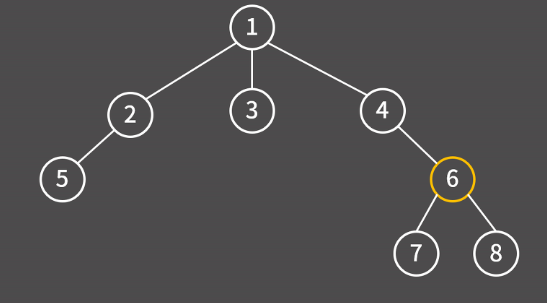
1번 시작점으로 두면 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 순으로 방문   
(2, 3, 4), (5, 6), (7, 8) 사이에서는 순서가 바뀔 수 있다. 

In [44]:
from collections import deque

adj = [[] for _ in range(10)]
p = [0] * 10 # 각 정점의 부모 번호를 저장할 배열(root의 부모는 0)
depth = [0] * 10

def bfs(root):
    q = deque()
    q.append(root)
    while q:
        cur = q.popleft()
        print(cur, end=' ')
        for nxt in adj[cur]: # nxt는 현재 노드와 인접한 노드
            if p[cur] == nxt:  # nxt가 cur의 부모인지 확인
                continue # 부모이면 건너뛰고
            q.append(nxt) #  부모가 아니면 큐에 넣는다.
            p[nxt] = cur
            depth[nxt] = depth[cur] + 1 # 자신의 depth는 부모의 depth + 1

n = int(input())
for _ in range(n-1):
    u, v = map(int, input().split())
    adj[u].append(v)
    adj[v].append(u)

print('---' * 10)
print(f"트리에서의 BFS:", end=' ')
bfs(1)

8
1 2
1 3
1 4
2 5
4 6
6 7
6 8
------------------------------
트리에서의 BFS: 1 2 3 4 5 6 7 8 

## DFS

- 임의의 시작점을 잡으면, 그 시작점을 루트로 정해서 트리를 재배치했을 때의 일단 갈 수 있는 곳까지 계속 들어가다가 더 이상 갈 수 없으면 돌아나와 다른 곳으로 간다

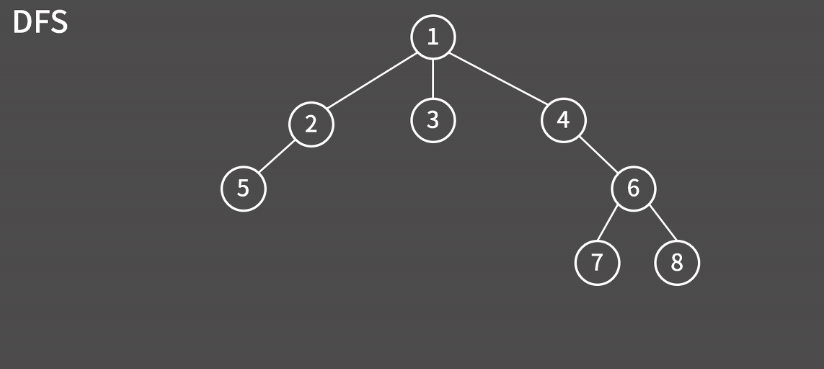
1번 시작점으로 두면 1 -> 2 -> 5 -> 3 -> 4 -> 6 -> 7 -> 8 순으로 방문   

In [39]:
# 부모와 depth 배열 채우기, 비재귀(stack)
adj = [[] for _ in range(10)]
p = [0] * 10 # 각 정점의 부모 번호를 저장할 배열(root의 부모는 0)
depth = [0] * 10

def dfs(root):
    stack = [] # queue만 stack으로 바꾸면 DFS로 처리가능
    stack.append(root)
    while stack:
        cur = stack.pop()
        print(cur, end=' ')
        for nxt in adj[cur]: # nxt는 현재 노드와 인접한 노드
            if p[cur] == nxt:  # nxt가 cur의 부모인지 확인
                continue # 부모이면 건너뛰고
            stack.append(nxt) #  부모가 아니면 큐에 넣는다.
            p[nxt] = cur
            depth[nxt] = depth[cur] + 1 # 자신의 depth는 부모의 depth + 1
            
n = int(input())
for _ in range(n-1):
    u, v = map(int, input().split())
    adj[u].append(v)
    adj[v].append(u)

print('---' * 10)
print(f"트리에서의 DFS:", end=' ')
dfs(1)

8
1 2
1 3
1 4
2 5
4 6
6 8
6 7
------------------------------
트리에서의 DFS: 1 4 6 7 8 3 2 5 

In [7]:
# 부모와 depth 배열 채우기, 재귀
def dfs(cur):
    print(cur)
    for nxt in adj[cur]: # nxt는 현재 노드와 인접한 노드
        if p[cur] == nxt:  # nxt가 cur의 부모인지 확인
            continue # 부모이면 건너뛰고
        p[nxt] = cur
        depth[nxt] = depth[cur] + 1 # 자신의 depth는 부모의 depth + 1
        dfs(nxt)

In [8]:
# 단순 순회, 재귀
def dfs(cur, par): # cur: 현재 보고 있는 노드, par: 부모노드
    print(cur)
    for nxt in adj[cur]: # nxt는 현재 노드와 인접한 노드
        if par == nxt:  # nxt가 cur의 부모인지 확인
            continue # 부모이면 건너뛰고
        dfs(nxt, cur)

In [13]:
n = int(input())

adj = [[] for _ in range(n+1)]
par = [-1] * (n+1)

for _ in range(n-1):
    u, v = map(int, input().split())
    adj[u].append(v)
    adj[v].append(u)
    

def dfs(cur):
    for nxt in adj[cur]:
        if par[cur] == nxt: continue
        par[nxt] = cur
        dfs(nxt)
    
dfs(1)
for i in range(2, n+1):
    print(par[i])

7
1 6
6 3
3 5
4 1
2 4
4 7
4
6
1
3
1
4


# 이진 트리(Binary Tree)
- 이진 트리: 부모 노드 밑의 자식 노드 개수(=차수, degree)를 최대 2개로 제한하는, 가장 기본적인 트리
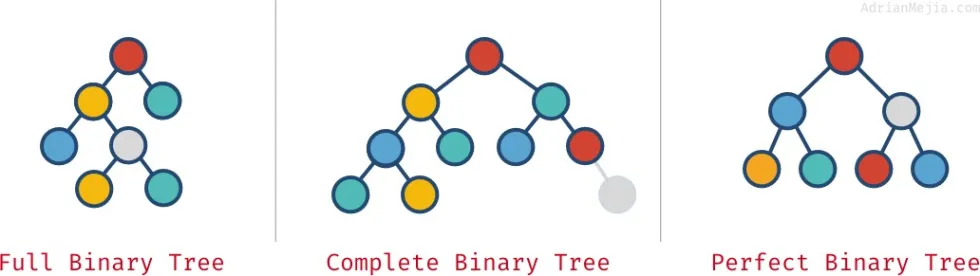

**이진 트리의 유형**
- 정 이진 트리(Full Binary Tree): 모든 노드가 0개 또는 2개의 자식 노드를 갖는다.
- 완전 이진 트리(Complete Binary Tree): 마지막 레벨을 제외하고 모든 레벨이 완전히 채워져 있으며, 마지막 레벨의 모든 노드는 가장 왼쪽부터 채워져 있다.
- 포화 이진 트리(Perfect Binary Tree): 모든 노드가 2개의 자식 노드를 갖고 있으며, 모든 리프 노드가 동일한 깊이 또는 레벨을 갖는다. 문자 그대로, 가장 완벽한 유형의 트리다.당연하게도, 포화 이진 트리는 완전 이진 트리이기도 하다.

## 이진 트리 순회 방법
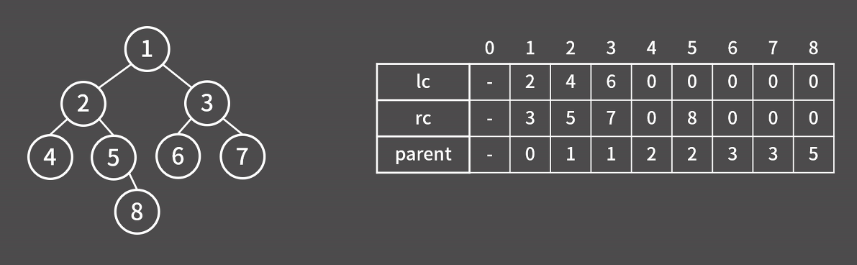
- 그래프에서 쓰던 방법이랑 똑같이 연결리스트에 넣어서 저장을 할 수 있지만, 왼쪽 자식과 오른쪽 자식을 구분하기 어렵다.
- 인접 리스트를 이용한 방법 대신, 왼쪽 자식과 오른쪽 자식을 배열로 저장할 수 있다.
- 배열에서 0이라는 값은 해당 자리가 비어있음을 의미한다.
> 출처: [바킹독님 블로그](https://blog.encrypted.gg/1019)

**Pre-order traversal(전위 순회)**
<img src="http://108.61.119.12/wp-content/uploads/2014/10/binary-tree-1-pre-order-small.gif" width="400px" height="300px">
- 자신, 왼쪽 자손, 오른쪽 자손 순서로 방문하는 순회 방법
- DFS와 방문 순서가 동일하다. (DFS가 일단 자기 자신을 방문한 후 첫번째 자식부터 들어가 거기에서 DFS를 다시 시작하는 구조이기 때문)

1. 현재 정점을 방문한다.
2. 왼쪽 서브 트리를 전위 순회한다.
3. 오른쪽 서브 트리를 전위 순회한다.

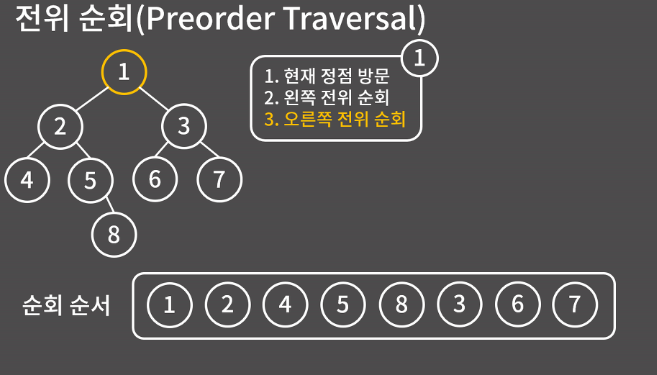

In [48]:
# lc, rc 테이블은 주어진 정보로 채우면 된다.
lc = [0, 2, 4, 6, 0, 0, 0, 0, 0]
rc = [0, 3, 5, 7, 0, 8, 0, 0, 0]

def preorder(cur):
    print(cur, end=' ')
    if lc[cur] != 0: preorder(lc[cur])
    if rc[cur] != 0: preorder(rc[cur])

preorder(1)

1 2 4 5 8 3 6 7 

**In-order traversal(중위 순회)**
<img src="http://108.61.119.12/wp-content/uploads/2014/10/binary-tree-1-order-small.gif" width="400px" height="300px">
- 왼쪽 자손, 자신, 오른쪽 자손 순서로 방문하는 순회 방법. 이진 탐색 트리를 중위 순회하면 정렬된 결과를 얻을 수 있다.
- 트리의 모양에서 가장 왼쪽에 있는 것부터 방문하는 순서

1. 왼쪽 서브 트리를 중위 순회한다.
2. 현재 정점을 방문한다.
3. 오른쪽 서브 트리를 중위 순회한다.

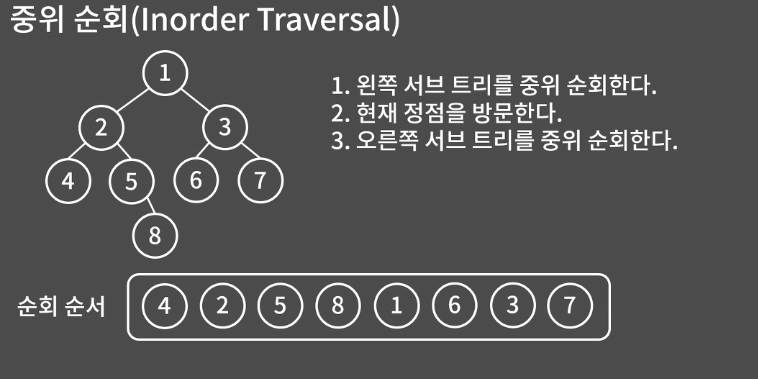

In [49]:
# lc, rc 테이블은 주어진 정보로 채우면 된다.
lc = [0, 2, 4, 6, 0, 0, 0, 0, 0]
rc = [0, 3, 5, 7, 0, 8, 0, 0, 0]

def inorder(cur):
    if lc[cur] != 0: inorder(lc[cur])
    print(cur, end=' ')
    if rc[cur] != 0: inorder(rc[cur])
        
inorder(1)

4 2 5 8 1 6 3 7 

**Post-order traversal(후위 순회)**
<img src="http://108.61.119.12/wp-content/uploads/2014/10/binary-tree-1-post-order-small.gif" width="400px" height="300px">
- 왼쪽 자손, 오른쪽 자손, 자신 순서로 방문하는 순회 방법

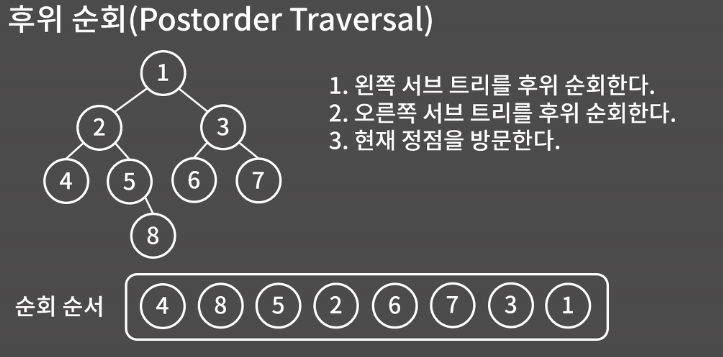

In [51]:
# lc, rc 테이블은 주어진 정보로 채우면 된다.
lc = [0, 2, 4, 6, 0, 0, 0, 0, 0]
rc = [0, 3, 5, 7, 0, 8, 0, 0, 0]

def postorder(cur):
    if lc[cur] != 0: postorder(lc[cur])
    if rc[cur] != 0: postorder(rc[cur])
    print(cur, end=' ')
    
postorder(1)

4 8 5 2 6 7 3 1 

**Level-order traversal(레벨 순서 순회)**
<img src="http://108.61.119.12/wp-content/uploads/2014/10/binary-tree-1-level-order-small.gif" width="400px" height="300px">
- 너비 우선 순회(Breadth-First traversal)라고도 한다. 노드를 **레벨, 즉 높이** 순서로 방문하는 순회 방법. 위의 세 가지 방법은 스택(및 재귀)를 활용하여 구현할 수 있는 반면 레벨 순서 순회는 큐를 활용해 구현할 수 있다. <u>루트를 시작점으로 두고 BFS를 돌렸을 때와 동일한 결과</u>

In [47]:
from collections import deque

# lc, rc 테이블은 주어진 정보로 채우면 된다.
lc = [0, 2, 4, 6, 0, 0, 0, 0, 0]
rc = [0, 3, 5, 7, 0, 8, 0, 0, 0]

def bfs(root):
    q = deque()
    q.append(root)
    while q:
        cur = q.popleft() # 현재 보고 있는 노드
        print(cur, end=' ')
        if lc[cur]: q.append(lc[cur]) # 현재 노드의 왼쪽 자식이 있으면 큐에 삽입
        if rc[cur]: q.append(rc[cur]) # 현재 노드의 오른쪽 자식이 있으면 큐에 삽입

bfs(1)

1 2 3 4 5 6 7 8 

# 이진 탐색 트리(Binary Search Tree, BST)
- 이진 탐색 트리 (Binary Search Tree, BST): 이진 트리에 다음과 같은 추가적인 조건이 있는 트리
  - 왼쪽 노드는 해당 노드보다 작은 값, 오른쪽 노드는 부모 노드보다 큰 값을 가지고 있다.
  - 정렬된 트리. 검색과 저장, 삭제의 시간 복잡도는 모두 $O(logN)$이고, worst case는 한 쪽으로 치우친 트리가 됐을 때 $O(N)$이다.
  
<img src="https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-insertion-animation.gif" />

(출처: https://www.mathwarehouse.com/programming/gifs/binary-search-tree.php#binary-search-tree-insertion-node)  

## 자료 구조 이진 탐색 트리의 장점과 주요 용도
- 주요 용도: 데이터 검색(탐색) 
- 장점: 탐색 속도를 개선할 수 있음

## 이진트리와 정렬된 배열간의 탐색 비교
<img src="https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-sorted-array-animation.gif" />

값을 찾을 때뿐만이 아니라 값을 삽입하거나 삭제할 때도 똑같은 과정을 거치므로, 이상적인 상황에서 탐색/삽입/삭제 모두 시간복잡도가 $O(log N)$이 된다.

(출처: https://www.mathwarehouse.com/programming/gifs/binary-search-tree.php#binary-search-tree-insertion-node)

---

# 파이썬 객체지향 프로그래밍으로 이진 탐색 트리 구현하기

## 노드 클래스 만들기

In [1]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

In [2]:
class BinarySearchTree(object):
    def __init__(self):
        self.root = None

## 이진 탐색 트리에 데이터 삽입
- 이진 탐색 트리 조건에 부합하게 데이터를 넣어야 함(재귀)

In [3]:
class BinarySearchTree(object):

    def insert(self, data):
        self.root = self._insert_value(self.root, data)
        return self.root is not None

    def _insert_value(self, node, data):
        if node is None: 
            node = Node(data) 
        else:
            if data <= node.data: # 삽입하려는 data가 현재 노드의 값보다 작다면
                node.left = self._insert_value(node.left, data) # 왼쪽 노드에 삽입
            else: # 현재 노드의 값보다 크다면
                node.right = self._insert_value(node.right, data) # 오른쪽 노드에 삽입
        return node

## 이진 탐색 트리 탐색

In [4]:
class BinarySearchTree(object):
    
    def find(self, key):
        return self._find_value(self.root, key)

    def _find_value(self, root, key):
        if root is None or root.data == key:
            return root is not None
        elif key < root.data: # key값이 현재 노드의 값보다 작다면
            return self._find_value(root.left, key) # 왼쪽 노드를 탐색
        else: # key값이 현재 노드의 값보다 크다면
            return self._find_value(root.right, key) # 오른쪽 노드를 탐색

## 이진 탐색 트리 삭제

### Leaf Node 삭제 
* Leaf Node: Child Node 가 없는 Node
* 삭제할 Node의 Parent Node가 삭제할 Node를 가리키지 않도록 한다. 
<img src="http://www.fun-coding.org/00_Images/tree_remove_leaf.png" width="800" />

### Child Node 가 하나인 Node 삭제 
* 삭제할 Node의 Parent Node가 삭제할 Node의 Child Node를 가리키도록 한다.
<img src="http://www.fun-coding.org/00_Images/tree_remove_1child.png" width="800" />

### Child Node 가 두 개인 Node 삭제
1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**
2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
<img src="http://www.fun-coding.org/00_Images/tree_remove_2child.png" width="800" />

**EX.삭제할 Node의 오른쪽 자식중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키게 할 경우**
- 삭제할 Node의 오른쪽 자식 선택
- 오른쪽 자식의 가장 왼쪽에 있는 Node를 선택
- 해당 Node를 삭제할 Node의 Parent Node의 왼쪽 Branch가 가리키게 함
- 해당 Node의 왼쪽 Branch가 삭제할 Node의 왼쪽 Child Node를 가리키게 함
- 해당 Node의 오른쪽 Branch가 삭제할 Node의 오른쪽 Child Node를 가리키게 함
- 만약 해당 Node가 오른쪽 Child Node를 가지고 있었을 경우에는, 해당 Node의 본래 Parent Node의 왼쪽 Branch가 해당 오른쪽 Child Node를 가리키게 함

## 이진 탐색 트리 삭제 코드 구현과 분석

### 삭제할 Node 탐색
삭제할 Node가 없는 경우도 처리해야 함
- 이를 위해 삭제할 Node가 없는 경우는 False를 리턴하고, 함수를 종료 시킴

In [237]:
class BinarySearchTree(object):
    
    def delete(self, key):
        self.root, deleted = self._delete_value(self.root, key)
        return deleted

    def _delete_value(self, node, key):
        if node is None:
            return node, False

        deleted = False
        if key == node.data:
            deleted = True
            if node.left and node.right:
                # replace the node to the leftmost of node.right
                parent, child = node, node.right
                while child.left is not None:
                    parent, child = child, child.left
                child.left = node.left
                if parent != node:
                    parent.left = child.right
                    child.right = node.right
                node = child
            elif node.left or node.right:
                node = node.left or node.right
            else:
                node = None
        elif key < node.data:
            node.left, deleted = self._delete_value(node.left, key)
        else:
            node.right, deleted = self._delete_value(node.right, key)
        return node, deleted

### Case1: 삭제할 Node가 Leaf Node인 경우
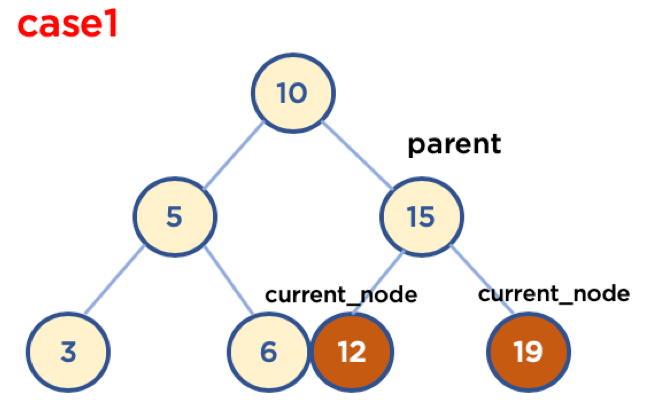

### Case2: 삭제할 Node가 Child Node를 한 개 가지고 있을 경우
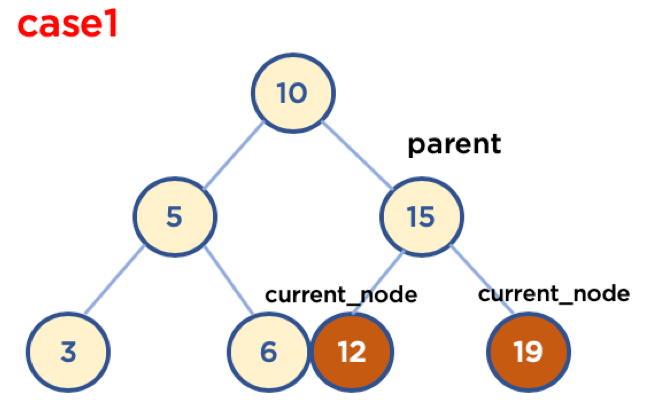

### Case3-1: 삭제할 Node가 Child Node를 두 개 가지고 있을 경우 (삭제할 Node가 Parent Node <u>왼쪽</u>에 있을 때)
* 기본 사용 가능 전략
  1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**
  2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
  
  
* 기본 사용 가능 전략 중, 1번 전략을 사용하여 코드를 구현하기로 함
  - 경우의 수가 또다시 두가지가 있음
    - **Case3-1-1:** 삭제할 Node가 Parent Node의 왼쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 Child Node가 없을 때
    - **Case3-1-2:** 삭제할 Node가 Parent Node의 왼쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 오른쪽에 Child Node가 있을 때
       - 가장 작은 값을 가진 Node의 Child Node가 왼쪽에 있을 경우는 없음, 왜냐하면 왼쪽 Node가 있다는 것은 해당 Node보다 더 작은 값을 가진 Node가 있다는 뜻이기 때문임


<img src="http://www.fun-coding.org/00_Images/tree_remove_2child_code_left.png" width="600" />

### Case3-2: 삭제할 Node가 Child Node를 두 개 가지고 있을 경우 (삭제할 Node가 Parent Node <u>오른쪽</u>에 있을 때)
* 기본 사용 가능 전략
  1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**
  2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
  
  
* 기본 사용 가능 전략 중, 1번 전략을 사용하여 코드를 구현하기로 함
  - 경우의 수가 또다시 두가지가 있음
    - **Case3-2-1:** 삭제할 Node가 Parent Node의 오른쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 Child Node가 없을 때
    - **Case3-2-2:** 삭제할 Node가 Parent Node의 오른쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 오른쪽에 Child Node가 있을 때
       - 가장 작은 값을 가진 Node의 Child Node가 왼쪽에 있을 경우는 없음, 왜냐하면 왼쪽 Node가 있다는 것은 해당 Node보다 더 작은 값을 가진 Node가 있다는 뜻이기 때문임


<img src="http://www.fun-coding.org/00_Images/tree_remove_2child_code_right.png" width="600" />

## 이진 탐색 트리 전체 소스 코드

In [75]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.left = self.right = None
                
class BinarySearchTree(object):
    
    def __init__(self):
        self.root = None
        
    def insert(self, data):
        self.root = self._insert_value(self.root, data)
        return self.root is not None

    def _insert_value(self, node, data):
        if node is None:
            node = Node(data)
        else:
            if data <= node.data:
                node.left = self._insert_value(node.left, data)
            else:
                node.right = self._insert_value(node.right, data)
        return node
        
    def find(self, key):
        return self._find_value(self.root, key)

    def _find_value(self, root, key):
        if root is None or root.data == key:
            return root is not None
        elif key < root.data:
            return self._find_value(root.left, key)
        else:
            return self._find_value(root.right, key)
    
    def delete(self, key):
        self.root, deleted = self._delete_value(self.root, key)
        return deleted # 삭제 여부

    def _delete_value(self, node, key):
        if node is None:
            return node, False

        deleted = False # 삭제 여부
        if key == node.data: # 삭제할 노드를 찾으면
            deleted = True # 삭제 가능
            if node.left and node.right: # 삭제할 노드가 왼쪽, 오른쪽 자식 노드를 가지고 있을 경우
                # replace the node to the leftmost of node.right
                parent, child = node, node.right
                while child.left is not None: # 삭제할 노드의 오른쪽 노드 중 왼쪽 노드의 가장 작은 값
                    parent, child = child, child.left
                child.left = node.left
                if parent != node:
                    parent.left = child.right
                    child.right = node.right
                node = child
            elif node.left or node.right: # 삭제할 노드가 왼쪽 or 오른쪽 노드 중 하나를 가지고 있는 경우
                node = node.left or node.right
            else:
                node = None
        elif key < node.data:
            node.left, deleted = self._delete_value(node.left, key)
        else:
            node.right, deleted = self._delete_value(node.right, key)
        return node, deleted

In [221]:
array = [10, 7, 15, 6, 8, 13, 11, 14, 18, 16, 17, 19]

bst = BinarySearchTree()
for x in array:
    bst.insert(x)

# Find
print(bst.find(10)) # True
print(bst.find(20)) # False

# Delete
print(bst.delete(55)) # False
print(bst.delete(14)) # True
print(bst.delete(15)) # True

True
False
False
True
True


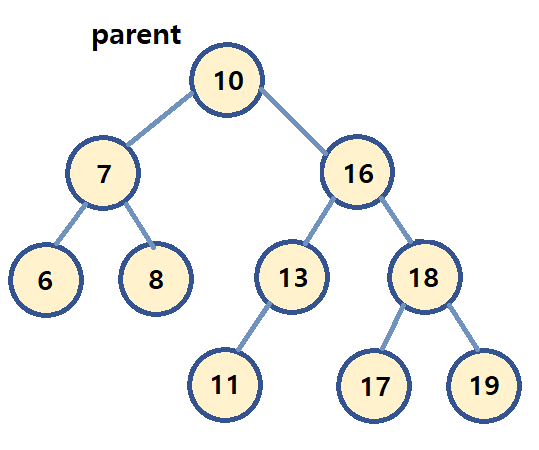

## 이진 탐색 트리의 시간 복잡도
**시간 복잡도 (탐색시)**
  - depth (트리의 높이) 를 h라고 표기한다면, O(h)
  - n개의 노드를 가진다면, $h = log_2{n} $ 에 가까우므로, 시간 복잡도는 $ O(log{n}) $ (삽입, 삭제, 탐색, 업데이트 모두 동일)
     - 참고: 빅오 표기법에서 $log{n}$ 에서의 log의 밑은 10이 아니라, 2입니다.
       - 한번 실행시마다, 50%의 실행할 수도 있는 명령을 제거한다는 의미. 즉 50%의 실행시간을 단축시킬 수 있다는 것을 의미함
<img src="https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-sorted-array-animation.gif" />

(출처: https://www.mathwarehouse.com/programming/gifs/binary-search-tree.php#binary-search-tree-insertion-node)

## 이진 탐색 트리 단점
  - 평균 시간 복잡도는 $ O(log{n}) $ 이지만, 
    - 이는 트리가 균형잡혀 있을 때의 평균 시간복잡도이며,
  - 다음 예와 같이 구성되어 있을 경우(정렬된 데이터), 최악의 경우는 모든 데이터를 살펴봐야 할 수 있어, 링크드 리스트등과 동일한 성능을 보여줌: $O(n)$
  - 오름차순이든 내림차순이든 정렬된 데이터가 입력되면 한쪽으로 치우친(skewed) 트리가 만들어지기 때문이다.
<img src="http://www.fun-coding.org/00_Images/worstcase_bst.png" width="300" />

**참고**
- https://blog.encrypted.gg/1019
- https://stackoverflow.com/questions/14315621/are-trees-directed-or-undirected-graphs
- https://mathworld.wolfram.com/Tree.html
- https://untitledtblog.tistory.com/85
- http://ejklike.github.io/2018/01/09/traversing-a-binary-tree-1.html
- https://www.fun-coding.org/Chapter10-tree.html
- https://namu.wiki/w/%ED%8A%B8%EB%A6%AC(%EA%B7%B8%EB%9E%98%ED%94%84)